In [1]:
import os
import pandas as pd
from math import ceil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import datetime
#pd.show_versions(as_json=False)

threshold = 1000

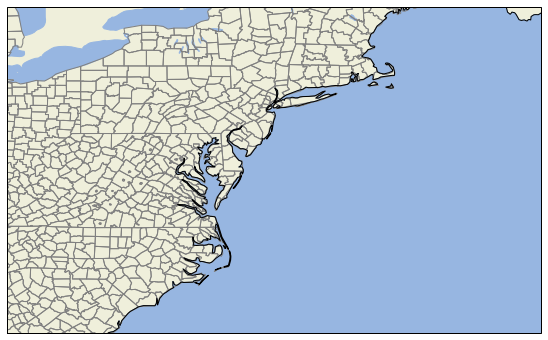

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt


#reader = shpreader.Reader('../other3p/county/countyl010g.shp')
reader = shpreader.Reader('../other3p/uscounties/uscounties.shp')

county_records = list(reader.records())
counties = [r.geometry for r in county_records]

COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')

ax.coastlines('50m')

ax.set_extent([-83, -65, 33, 44])
plt.show()

In [3]:
for c in county_records[80:85]:
    print(c.attributes)

{'NAME': 'Dawson', 'STATE_NAME': 'Montana', 'STATE_FIPS': '30', 'CNTY_FIPS': '021', 'FIPS': '30021'}
{'NAME': 'King', 'STATE_NAME': 'Washington', 'STATE_FIPS': '53', 'CNTY_FIPS': '033', 'FIPS': '53033'}
{'NAME': 'Cascade', 'STATE_NAME': 'Montana', 'STATE_FIPS': '30', 'CNTY_FIPS': '013', 'FIPS': '30013'}
{'NAME': 'Griggs', 'STATE_NAME': 'North Dakota', 'STATE_FIPS': '38', 'CNTY_FIPS': '039', 'FIPS': '38039'}
{'NAME': 'Steele', 'STATE_NAME': 'North Dakota', 'STATE_FIPS': '38', 'CNTY_FIPS': '091', 'FIPS': '38091'}


In [4]:
# Load Data
def load_raw(fn):
    datapath = os.path.join('../csse_covid_19_data/csse_covid_19_time_series/', fn)

    #datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    
    raw = pd.read_csv(datapath)
    #del raw['Lat']
    #del raw['Long']
    #raw= raw.replace('Mainland China','China')
    raw = raw[raw.iso2=='US']
    raw = raw[pd.notnull(raw.UID) & ~(raw.Lat==0.0)]
    # fix HI/AK later
    raw = raw[~(raw.Province_State=='Alaska') & ~(raw.Province_State=='Hawaii')]
    return raw

raw = load_raw('time_series_covid19_confirmed_us.csv')
#raw_deaths = load_raw('time_series_covid19_deaths_global.csv')

raw


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,428,436,447,463,473,482,492,497,521,530
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,415,422,435,449,462,500,539,559,626,663
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,271,276,279,287,303,309,314,314,319,322
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,124,126,132,138,146,150,158,159,162,167
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,146,150,156,165,173,181,185,186,196,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,102,110,114,117,117,127,134,143,159,169
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,31,31,31,32,32,33,34,35,35,36
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,1056,1104,1151,1200,1258,1302,1361,1428,1467,1519
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,38,39,39,40,42,45,46,48,48,50


In [5]:
raw[raw['FIPS']==53033]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
2974,84053033,US,USA,840,53033.0,King,Washington,US,47.491379,-121.834613,...,9211,9253,9366,9453,9573,9672,9809,9895,10019,10177


{2050, 2180, 2185, 2060, 2188, 2068, 2070, 2201, 15001, 15003, 15005, 15007, 46113, 15009, 2090, 2220, 2100, 2232, 51515, 2110, 2240, 2122, 2130, 2261, 2013, 2270, 2016, 2020, 2150, 2280, 2282, 2290, 2164, 2170}
{46102, -1}
[1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1017, 1019]
[-1, 1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1017]
3141 3141


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141
3141 3141


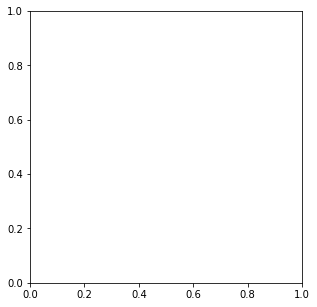

3141 3141


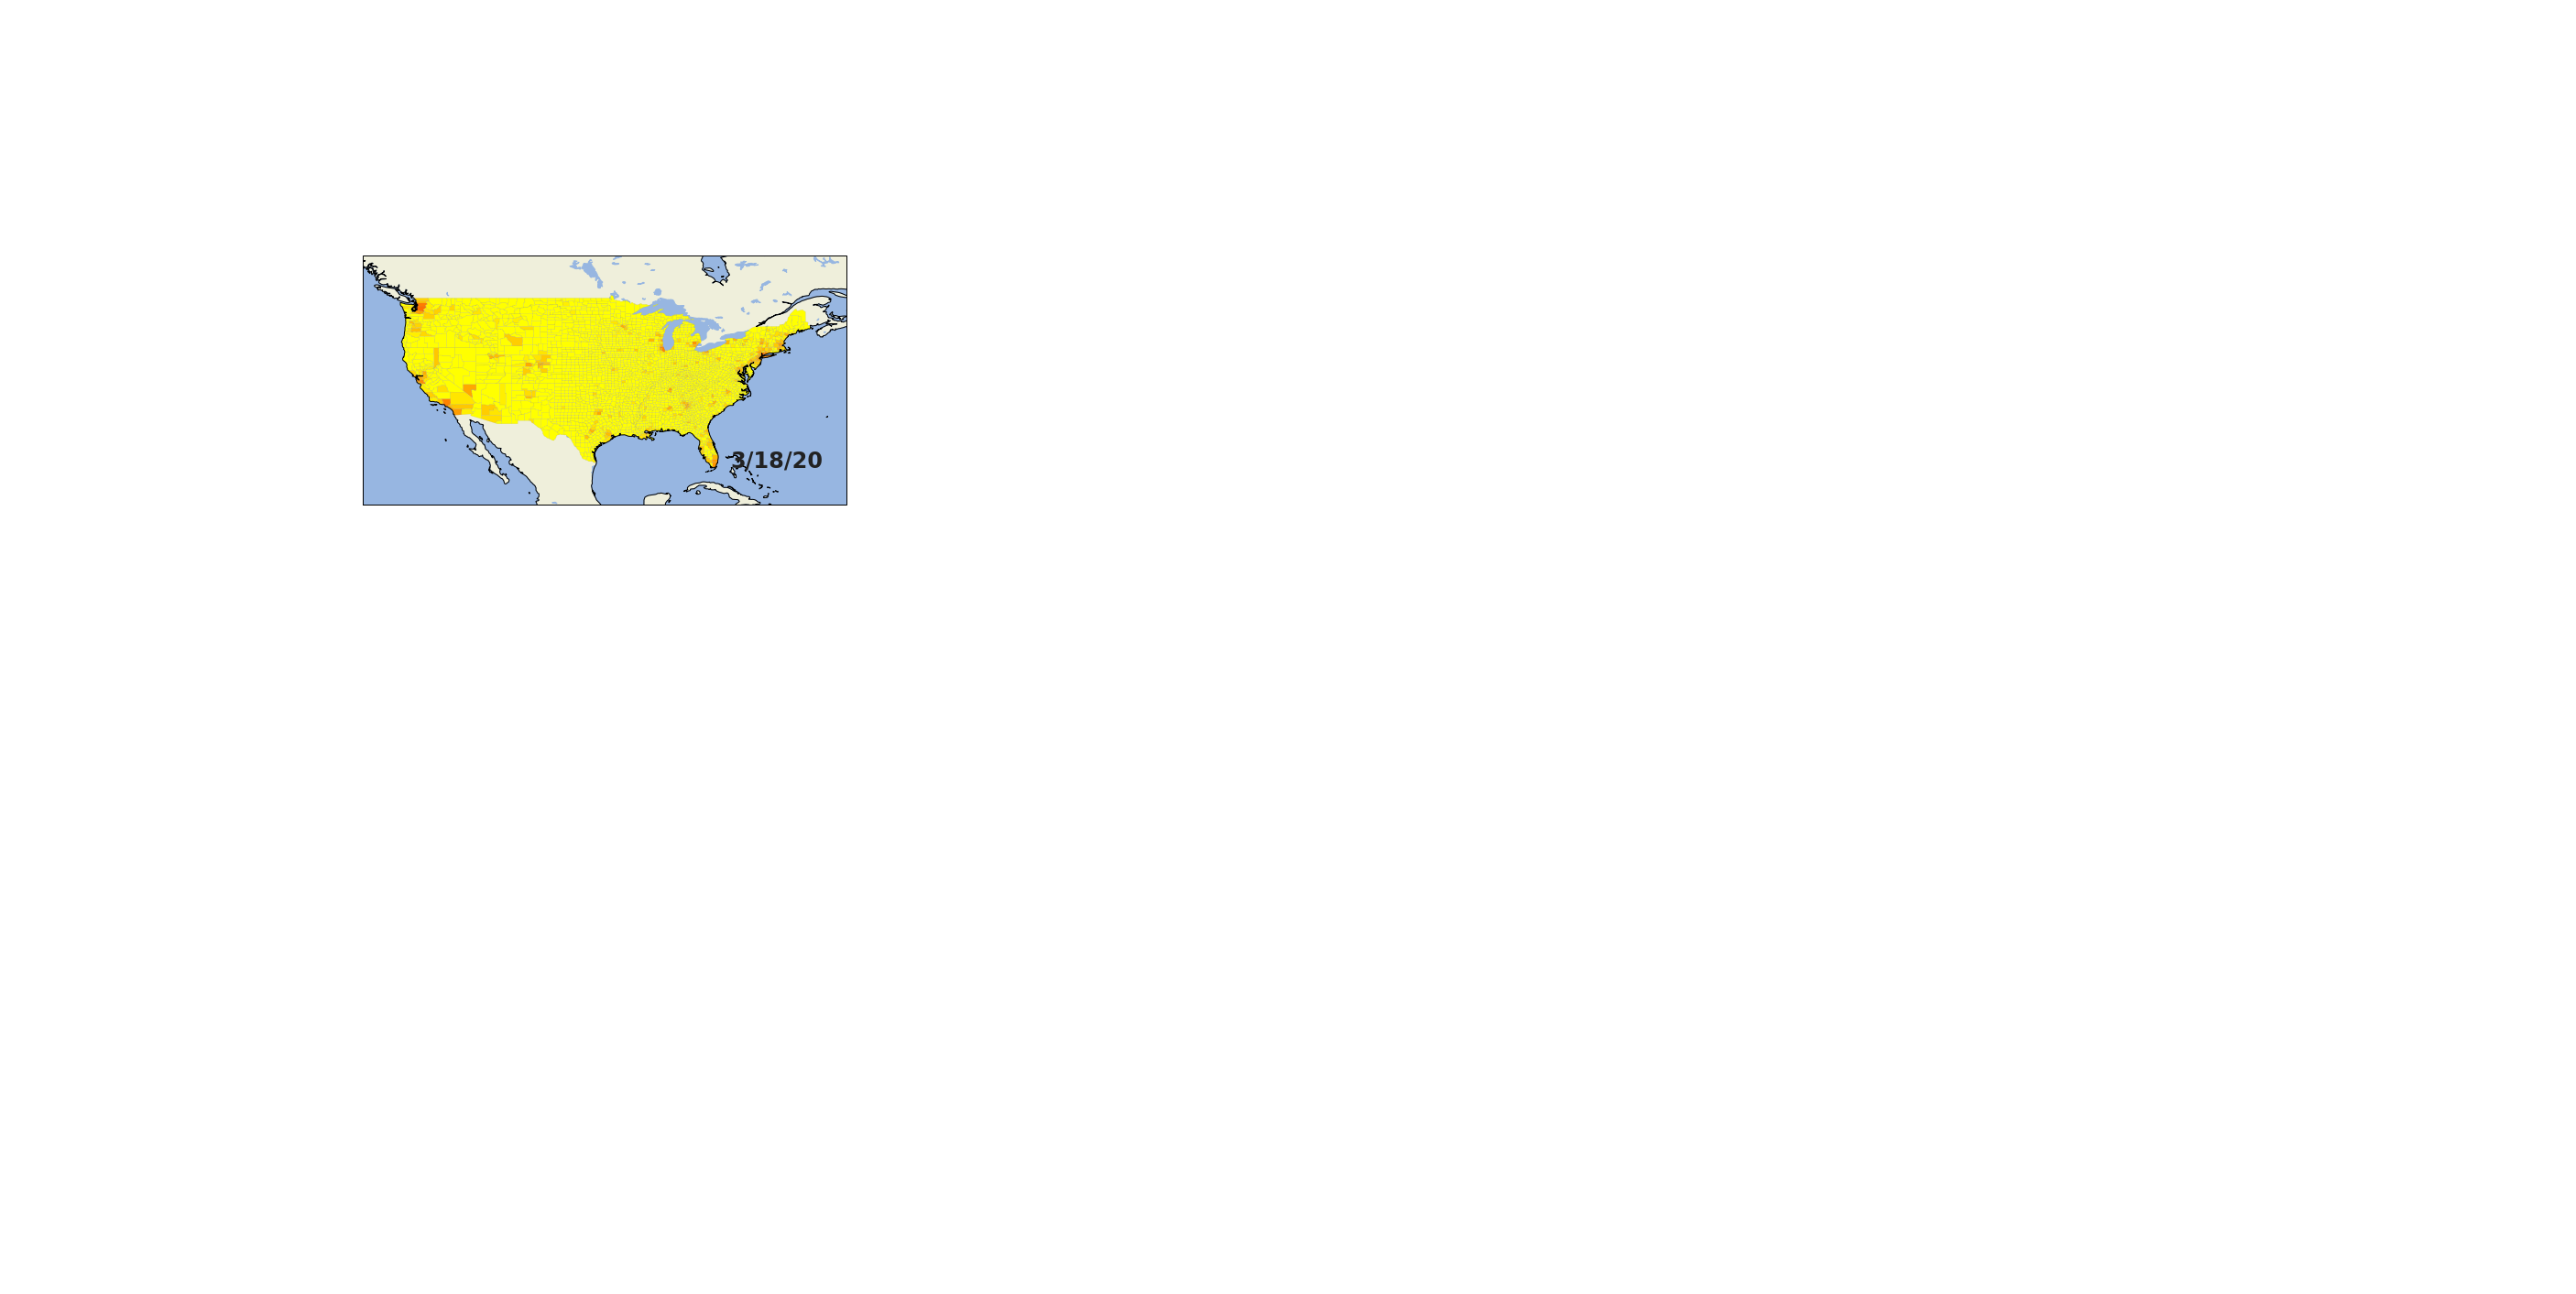

In [6]:
#%%capture
%matplotlib inline
from math import log
plt.rcParams["figure.figsize"] = [10, 5]
x=raw['Long_']
y=raw['Lat']
#c=raw['4/19/20'].apply(lambda x: log(x) if x>0 else 0)
weeks = 16
window = 7
dates=raw.columns[-weeks*7:]
#print(dates)
new = [(raw[dates[i]]-raw[dates[i-window]]).apply(lambda x: log(x) if x>0 else 0) for i in range(window,len(dates))]
maxval=max([c.max() for c in new])
#print(c.min(),c.max())
plt.gca().set_aspect('equal', adjustable='box')
fig, ax = plt.subplots()

#plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-83, -65, 33, 44])

fips = raw['FIPS'].fillna(-1).apply(lambda x: int(x))

cty_fips = set([int(r.attributes['FIPS']) for r in county_records])
raw_fips = set(fips)

print(cty_fips.difference(raw_fips))
print(raw_fips.difference(cty_fips))

print(list(sorted(cty_fips))[:10])
print(list(sorted(raw_fips))[:10])

#plt.show()
lookup_0 = dict(zip(list(fips),list(raw['Admin2'])))
test_mapping = zip([r.attributes['NAME'] for r in county_records], [lookup_0[int(r.attributes['FIPS'])] if int(r.attributes['FIPS']) in lookup_0 else 'missing' for r in county_records])
#for (r,l) in test_mapping:
#    print(r,l)

cmap=plt.cm.autumn_r
#norm=plt.Normalize(min(mapping),max(mapping))
norm=plt.Normalize(0,maxval)
    
from math import exp

def plot_map(date_tuple):
    c,dt = date_tuple
    # todo: this could be done outside the call.
    #print(len(fips),len(c))
    lookup = dict(zip(list(fips),c))
    #print(lookup)
    mapping = [lookup[int(r.attributes['FIPS'])] if int(r.attributes['FIPS']) in lookup else 0.0 for r in county_records]    
    mapping_ext = []
    for (m,c) in zip(mapping,counties):
        mapping_ext+=[m]*len(c.geoms)
    #print(mapping)
    #print(min(mapping),max(mapping))
    print(len(mapping),len(counties))
    #print(dt)
    ax.clear()
    ax.add_feature(cfeature.LAND.with_scale('50m'))
    ax.add_feature(cfeature.OCEAN.with_scale('50m'))
    ax.add_feature(cfeature.LAKES.with_scale('50m'))
    #print(max(mapping),cmap(norm(max(mapping))))
    #add_feature(COUNTIES
    ax.add_geometries(counties, ccrs.PlateCarree(), facecolor=list(cmap(norm(mapping_ext))), edgecolor='gray', linewidth=0.1)
    ax.coastlines('50m')

    #ax.scatter(x,y, c=c, alpha=0.5, cmap='autumn_r')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_extent([-76,-72,38,42]) # Manhattan
    #ax.set_extent([-83, -65, 33, 44]) Eastern Seaboard
    #ax.set_extent([-124,-120,46,49]) # Western WA
    ax.set_extent([-130,-62,20,50]) # US
    plt.box(False)
    ax.text(0.95, 0.15, dt, transform=ax.transAxes, color='#222222', size=24, ha='right', weight=800)

frames = list(zip(new,dates[window:]))
plot_map(frames[-1])
animator = animation.FuncAnimation(fig, plot_map, frames=frames, repeat=False)
#HTML(animator.to_jshtml()) 

maxDate=raw.columns[-1].replace('/','-')
#animator.save('data/animation-fill-{}.gif'.format(maxDate))
animator.save('data/animation-fill-latest.gif')


In [7]:
fips

5       1001
6       1003
7       1005
8       1007
9       1009
        ... 
3256      -1
3257      -1
3258      -1
3259      -1
3260      -1
Name: FIPS, Length: 3116, dtype: int64